# Bootstrapping: กระบวนการจำลอง (Simulation) เพื่อหาค่าทางสถิติ

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load example dataset
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
tips['tip'].mean()

np.float64(2.99827868852459)

In [16]:
tips['tip'].median()

np.float64(2.9)

In [17]:
# Extract 'tip' column
data = tips['tip'].dropna().values
data

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.5 ,  3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  2.  ,
        2.  ,  4.3 ,  3.  ,  1.45,  2.5 ,  3.  ,  2.45,  3.27,  3.6 ,
        2.  ,  3.07,  2.31,  5.  ,  2.24,  2.54,  3.06,  1.32,  5.6 ,
        3.  ,  5.  ,  6.  ,  2.05,  3.  ,  2.5 ,  2.6 ,  5.2 ,  1.56,
        4.34,  3.51,  3.  ,  1.5 ,  1.76,  6.73,  3.21,  2.  ,  1.98,
        3.76,  2.64,  3.15,  2.47,  1.  ,  2.01,  2.09,  1.97,  3.  ,
        3.14,  5.  ,  2.2 ,  1.25,  3.08,  4.  ,  3.  ,  2.71,  3.  ,
        3.4 ,  1.83,  5.  ,  2.03,  5.17,  2.  ,  4.  ,  5.85,  3.  ,
        3.  ,  3.5 ,  1.  ,  4.3 ,  3.25,  4.73,  4.  ,  1.5 ,  3.  ,
        1.5 ,  2.5 ,  3.  ,  2.5 ,  3.48,  4.08,  1.64,  4.06,  4.29,
        3.76,  4.  ,  3.  ,  1.  ,  4.  ,  2.55,  4.  ,  3.5 ,  5.07,
        1.5 ,  1.8 ,  2.92,  2.31,  1.68,  2.5 ,  2.  ,  2.52,  4.2 ,
        1.48,  2.  ,

## [1, 2, 3, 4] -> [1, 2, 1, 2], [1, 1, 1, 4], [2, 3, 4, 2]

In [18]:
# Bootstrapping parameters
n_iterations = 1000
sample_size = len(data)
boot_means = []

# Bootstrapping loop
for _ in range(n_iterations):
    sample = np.random.choice(data, size=sample_size, replace=True)
    boot_means.append(np.mean(sample))

In [19]:
boot_means

[np.float64(2.8718852459016393),
 np.float64(3.00577868852459),
 np.float64(3.002213114754098),
 np.float64(3.1371311475409835),
 np.float64(2.8913934426229506),
 np.float64(3.0176639344262295),
 np.float64(3.0629508196721313),
 np.float64(2.962295081967213),
 np.float64(2.96655737704918),
 np.float64(2.9398770491803274),
 np.float64(3.158032786885246),
 np.float64(3.094959016393443),
 np.float64(2.961434426229508),
 np.float64(3.0079918032786885),
 np.float64(2.9532377049180325),
 np.float64(2.939549180327869),
 np.float64(3.0931557377049175),
 np.float64(2.919344262295082),
 np.float64(2.9045901639344263),
 np.float64(2.882704918032787),
 np.float64(2.9203278688524588),
 np.float64(2.8996721311475415),
 np.float64(2.971967213114754),
 np.float64(3.0384426229508192),
 np.float64(2.85327868852459),
 np.float64(2.963729508196722),
 np.float64(3.0762295081967213),
 np.float64(3.0163524590163933),
 np.float64(3.0643852459016396),
 np.float64(3.127459016393443),
 np.float64(3.1882377049180

In [20]:
# Confidence interval (95%)
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

# Display results
print(f"Original Mean Tip: {np.mean(data):.2f}")
print(f"Bootstrapped Mean CI (95%): [{lower_bound:.2f}, {upper_bound:.2f}]")

Original Mean Tip: 3.00
Bootstrapped Mean CI (95%): [2.83, 3.17]


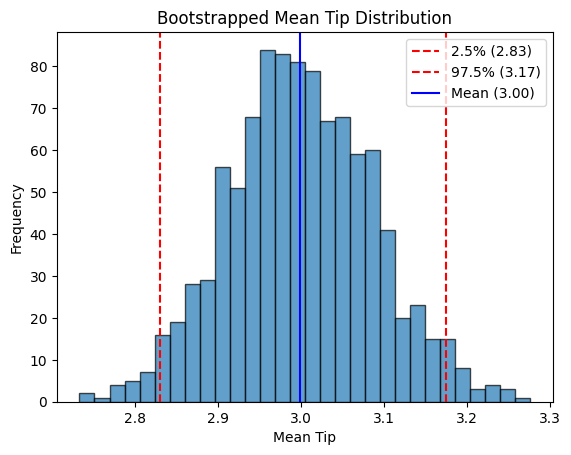

In [21]:
# Optional: Visualize
plt.hist(boot_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'2.5% ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'97.5% ({upper_bound:.2f})')
plt.axvline(np.mean(data), color='blue', linestyle='-', label=f'Mean ({np.mean(data):.2f})')
plt.title('Bootstrapped Mean Tip Distribution')
plt.xlabel('Mean Tip')
plt.ylabel('Frequency')
plt.legend()
plt.show()